In [13]:
%matplotlib inline
import pandas as pd  
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings 

### 一、数据预处理

##### （1）查看数据结构
##### （2）查看是否有缺失值并进行处理
##### （3）查看是否有重复值并进行处理
##### （4）处理异常值

In [14]:
#导入表数据，查看数据情况
Basket = pd.read_csv('Basket-2018-06-01-2018-07-05.csv',encoding='gbk')  # 取WordIndex.csv 数据
item = pd.read_csv('item-2018-06-01-2018-07-05.csv',encoding='gbk')  # 取WordIndex.csv 数据
print(Basket.shape)  
print(item.shape) 

(571552, 5)
(1732761, 10)


In [15]:
#修改简化列名
Basket.columns=['date','shop','pos','bask','bask_spend']
item.columns=['date','shop','pos','bask','item','item_quantity','item_spend','price','discount_type','discount']

In [16]:
Basket.head(5)   #查看前5行数据

,date,shop,pos,bask,bask_spend
0,2018/6/1,D007,3,250458,8.0
1,2018/6/1,D007,3,250200,32.7
2,2018/6/1,D007,1,161068,16.8
3,2018/6/1,D007,8,5325,30.4
4,2018/6/1,D007,8,5361,191.3


In [17]:
item.tail()   #查看前5行数据

,date,shop,pos,bask,item,item_quantity,item_spend,price,discount_type,discount
1732756,2018-07-05,A010,2,284254,144474,0.47,26.32,56.0,n,0.0
1732757,2018-07-05,A010,2,284265,2243,24.00,43.20,1.8,n,0.0
1732758,2018-07-05,A010,2,284406,216571,1.00,14.50,14.5,n,0.0
1732759,2018-07-05,A010,2,284266,223768,1.00,2.50,3.0,m,-0.5
1732760,2018-07-05,A010,2,284263,205100,1.00,6.80,6.8,n,0.0


In [18]:
#数据类型和结构、空值情况
Basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571552 entries, 0 to 571551
Data columns (total 5 columns):
date          571552 non-null object
shop          571552 non-null object
pos           571552 non-null int64
bask          571552 non-null int64
bask_spend    571552 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 21.8+ MB


In [19]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732761 entries, 0 to 1732760
Data columns (total 10 columns):
date             object
shop             object
pos              int64
bask             int64
item             int64
item_quantity    float64
item_spend       float64
price            float64
discount_type    object
discount         float64
dtypes: float64(4), int64(3), object(3)
memory usage: 132.2+ MB


In [20]:
#重复值情况
Basket.duplicated().sum()

0

In [21]:
item.duplicated().sum()

212724

In [24]:
item[~(item['item_quantity']<0)]
item[~(item['item_spend']<0)]

,date,shop,pos,bask,item,item_quantity,item_spend,price,discount_type,discount
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0
...,...,...,...,...,...,...,...,...,...,...
1732756,2018-07-05,A010,2,284254,144474,0.470,26.32,56.0,n,0.0
1732757,2018-07-05,A010,2,284265,2243,24.000,43.20,1.8,n,0.0
1732758,2018-07-05,A010,2,284406,216571,1.000,14.50,14.5,n,0.0
1732759,2018-07-05,A010,2,284266,223768,1.000,2.50,3.0,m,-0.5


### 小结
#####  （1）Basket表有571552条记录和五个标签类，item表有1732761条记录和十个标签类，查看内容可以简单判断item内一种商品被购买多次，不能进行简单的合并
#####  （2）综上分析，共有24家超市，使用pos机14台，购物篮高达281211个，商品17441种，折扣9种。其中，A001商店销售数量最高，D010最少；2号pos机经办金额最高，19号最低；n折扣有效数最高，h折扣只有一次。

### 二、Basket表分析

##### （1）平均日消费额
##### （2）各日销售额情况
##### （3）商店销售额的盒状图分布
##### （4）各店的销售额情况
##### （5）pos机经办金额情况

In [25]:
#日均消费
days= Basket.drop_duplicates(subset=['date'])
totalMoney = Basket.loc[:,'bask_spend'].sum()
totalI = days.shape[0]
days_m=totalMoney//totalI
days_m

636436.0

In [26]:
#更改日期格式
from pandas import to_datetime
Basket1=Basket
Basket1.date=to_datetime(Basket1.date,format="%Y/%m/%d")
Basket1

,date,shop,pos,bask,bask_spend
0,2018-06-01,D007,3,250458,8.00
1,2018-06-01,D007,3,250200,32.70
2,2018-06-01,D007,1,161068,16.80
3,2018-06-01,D007,8,5325,30.40
4,2018-06-01,D007,8,5361,191.30
...,...,...,...,...,...
571547,2018-07-05,A010,2,284211,34.71
571548,2018-07-05,A010,2,284601,44.80
571549,2018-07-05,A010,2,284241,6.50
571550,2018-07-05,A010,2,284352,15.90


In [27]:
Basket1_sale=Basket1.drop(['shop','pos','bask'],axis=1)
daysale=Basket1_sale.groupby(Basket1.date)
daysale=daysale.sum()
daysale

,bask_spend
date,
2018-06-01,717327.28
2018-06-02,727910.16
2018-06-03,682779.75
2018-06-04,557813.05
2018-06-05,663394.81
2018-06-06,498250.71
2018-06-07,436109.19
2018-06-08,564402.27
2018-06-09,679629.48


(array([4., 2., 4., 5., 6., 1., 2., 3., 4., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 411610.22      ,  448092.98966667,  484575.75933333,
         521058.529     ,  557541.29866667,  594024.06833333,
         630506.838     ,  666989.60766667,  703472.37733334,
         739955.147     ,  776437.91666667,  812920.68633334,
         849403.456     ,  885886.22566667,  922368.99533334,
         958851.765     ,  995334.53466667, 1031817.30433334,
        1068300.074     , 1104782.84366667, 1141265.61333334,
        1177748.383     , 1214231.15266667, 1250713.92233334,
        1287196.692     , 1323679.46166667, 1360162.23133334,
        1396645.001     , 1433127.77066667, 1469610.54033334,
        1506093.31      ]),
 <a list of 30 Patch objects>)

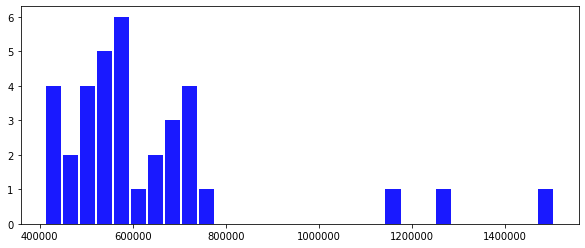

In [28]:
plt.figure(figsize=(10,4))
plt.hist(daysale.bask_spend,bins=30,color = 'blue', alpha = 0.9,rwidth=0.9)

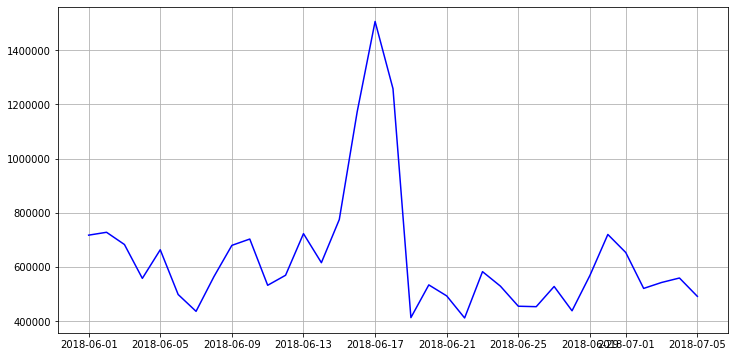

In [32]:
fig, ax = plt.subplots()
ax.grid()
plt.plot(daysale['bask_spend'],color='blue')
plt.rcParams['figure.figsize'] = (12.0,5.0)

In [33]:
shop_group=Basket1.drop(['pos','bask'],axis=1)
shop_group=shop_group.groupby(shop_group.shop)
shopsale=shop_group.sum()
shopsale.head()

,bask_spend
shop,
A001,3.435303e+06
A004,5.123467e+05
A006,9.383050e+05
A007,6.866382e+05
A008,1.311171e+06


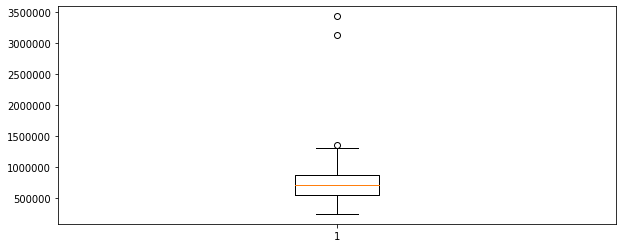

In [34]:
#商店销售箱图
plt.figure(figsize=(10,4))
plt.boxplot(shopsale.bask_spend)
plt.show()

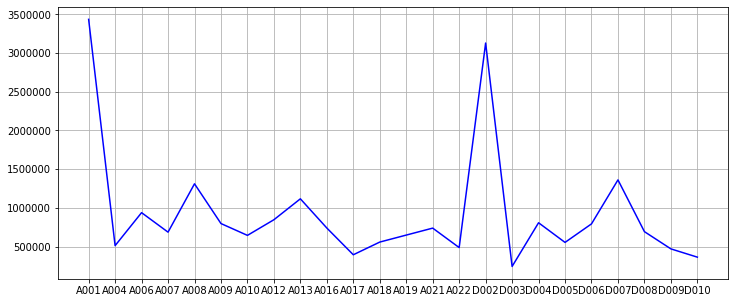

In [35]:
fig, ax = plt.subplots()
ax.plot(shopsale['bask_spend'],color='blue')
ax.grid()
plt.rcParams['figure.figsize'] = (10.0, 4.0)

In [36]:
Basket1_pos=Basket1.drop(['shop','bask','date'],axis=1)
possale=Basket1_pos.groupby(Basket1_pos.pos)
possale=possale.sum()
possale.head(15)

,bask_spend
pos,
1,5.855182e+06
2,6.430271e+06
3,3.790393e+06
4,1.256465e+06
5,5.634729e+05
6,1.495840e+06
7,6.595674e+04
8,1.101063e+06
9,7.188852e+05


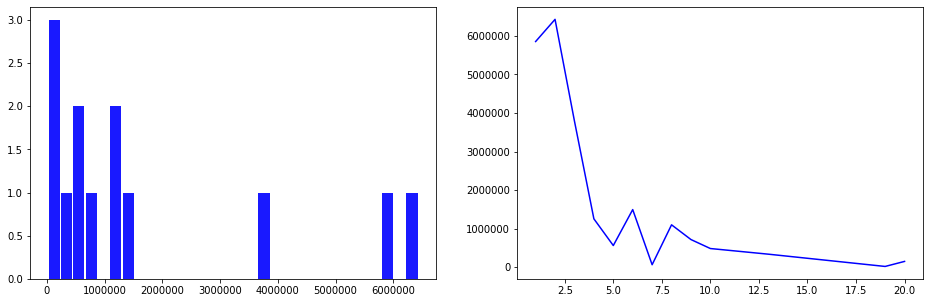

In [37]:
plt.figure(figsize=(16,5))
ax1 = plt.subplot(121)
plt.hist(possale.bask_spend,bins=30,color = 'blue', alpha = 0.9,rwidth=0.9)
ax2 = plt.subplot(122)
plt.plot(possale['bask_spend'],color='blue')

#### 小结
##### （1）日平均销售额达到636436
##### 直方图对销售额数值范围出现的情况做了总结，从图中可以看出，将销售额以100000为间隔划分为11组，日销售额大多在400000-800000之间，最高日销售额达150000，但总体分析，日销售额很少嫩达到100000以上，较高的日销售额可能由于节假日或特殊活动。
##### （2）2018-6-17日是销售额和销售量最高的一天，查看日历发现该天为中秋节，购买需求较大
##### 时间索引下的折线图可以看出从2018-6-1至2018-7-5之间每日销售额的整体趋势，明显的峰值出现在2018-6-17（农历中秋）,在该节假日当天销售额出现跳跃式增长。
##### （3）A001商店销售数量最高，D010最少
##### 商店A001和D002的销售额最高，这种情况可能与商店所在的位置、营销策略等有关
##### （4）2号pos机经办金额最高，可猜测其属于销量、销售额高的店铺
##### 经办金额多在0~2000000之间，1号、2号出现较高经办额

### 三、item表分析

##### （1）同Basket表的四项分析，观察结果因记录数量不同是否有差别以及有怎样的差别
##### （2）每日销量与每个商店的销量分布
##### （3）各类折扣的优惠总额及使用频数比例分布
##### （4）各种商品的销量和销售额
##### （5）各属性间的相关性
##### （6）销量最高的五种商品间的相关性

In [142]:
#日均消费
days2= item.drop_duplicates(subset=['date'])
totalMoney2 = Basket.loc[:,'bask_spend'].sum()
total2 = days2.shape[0]
days2_m=totalMoney2//total2
days2_m

636436.0

In [19]:
#更改日期格式
from pandas import to_datetime
item1=item
item1.date=to_datetime(item1.date,format="%Y/%m/%d")
daysale2=item1.groupby(item1.date)
daysale2=daysale2.sum()
daysale2.head(10)

,pos,bask,item,item_quantity,item_spend,price,discount
date,,,,,,,
2018-06-01,188212,8462995957,6558491640,78168.366,719667.99,846855.179166,-118289.83
2018-06-02,184173,9024162983,6855179863,79518.920,730030.08,892067.470774,-126727.68
2018-06-03,168960,8162116016,6128192591,80749.489,685279.36,790901.259048,-113021.77
2018-06-04,130376,6577713969,4828119079,59287.958,560063.10,641819.421190,-89138.33
2018-06-05,148329,7120302777,5306012500,70539.302,665581.44,724988.786548,-115284.28
2018-06-06,128128,6638708919,4790282981,57260.072,501199.09,552325.275714,-26472.58
2018-06-07,106738,5969095888,4090634753,49092.997,437448.31,473969.926012,-18213.50
2018-06-08,131041,7346900744,5162671429,60346.465,565651.69,668829.439345,-81986.76
2018-06-09,153163,8585192538,6124789996,68745.181,681885.49,790307.731667,-103324.21


In [144]:
shop_group2=item1.groupby(item1.shop)
shopsale2=shop_group2.sum()
shopsale2.head(10)

,pos,bask,item,item_quantity,item_spend,price,discount
shop,,,,,,,
A001,1023657,33834418887,21611938669,299441.050,3.435303e+06,3.289280e+06,-454457.05
A004,92893,5308636775,5306137008,61678.588,5.123467e+05,6.361111e+05,-58657.79
A006,178419,22107307888,8846042267,109991.605,9.383050e+05,1.086665e+06,-115700.27
A007,89317,5800522408,5677698695,77427.400,6.866382e+05,7.393313e+05,-78634.92
A008,257087,23038411302,11891395171,150902.334,1.311171e+06,1.508039e+06,-138164.49
A009,75900,12256944992,6474076011,85888.264,7.977389e+05,8.559443e+05,-81139.40
A010,119592,12218321740,5587348944,79329.307,6.448924e+05,6.851562e+05,-73648.42
A012,151524,15783811763,7276541812,94920.342,8.469747e+05,9.007657e+05,-116310.50
A013,280803,14270122267,8719523803,124035.187,1.117126e+06,1.168795e+06,-135125.86


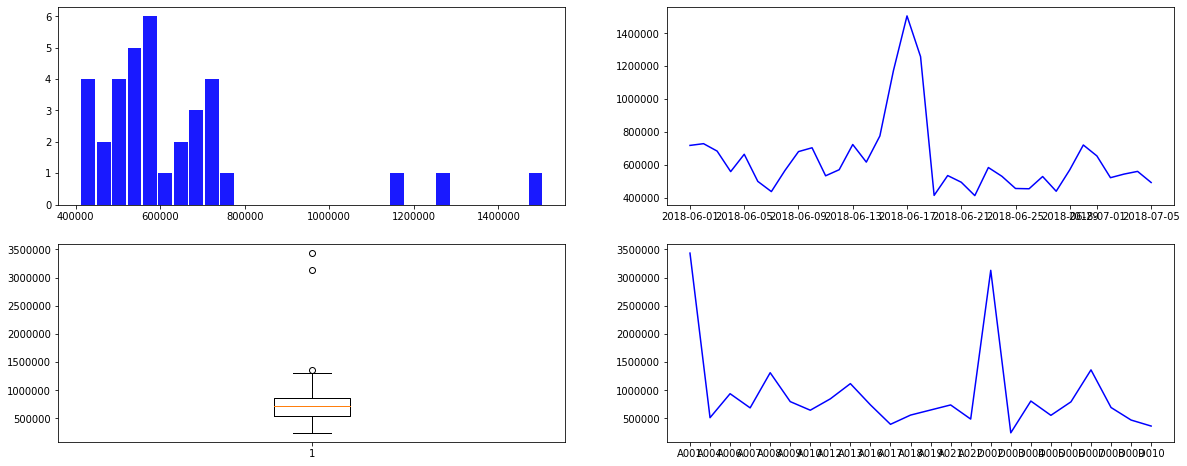

In [158]:
#销售额
plt.figure(figsize=(20,8))
ax1 = plt.subplot(221)
plt.hist(daysale2.item_spend,bins=30,color = 'blue', alpha = 0.9,rwidth=0.9)
ax2 = plt.subplot(222)
plt.plot(daysale2['item_spend'],color='blue')
ax3 = plt.subplot(223)
plt.boxplot(shopsale2.item_spend)
ax4 = plt.subplot(224)
plt.plot(shopsale2['item_spend'],color='blue')

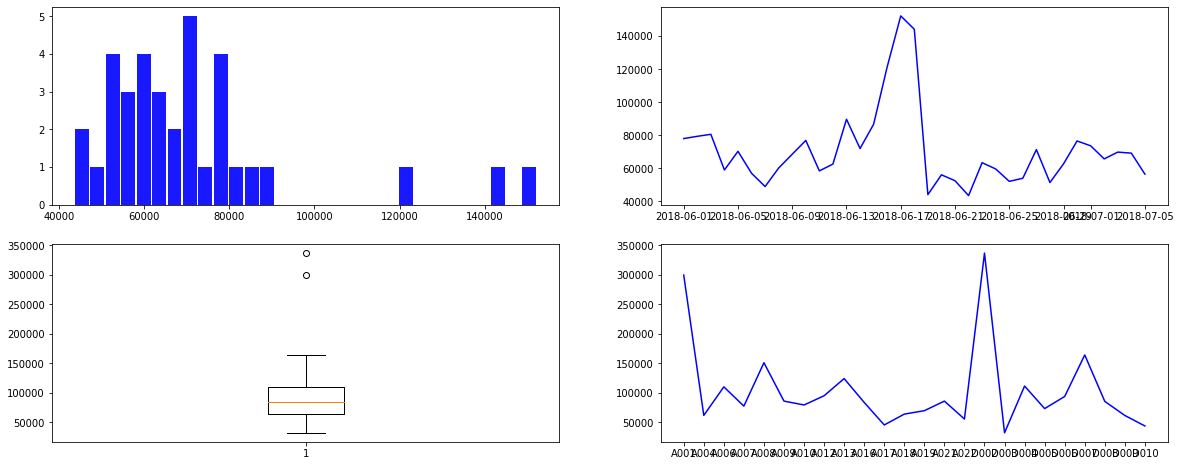

In [160]:
#各日和各店销量
plt.figure(figsize=(20,8))
ax1 = plt.subplot(221)
plt.hist(daysale2.item_quantity,bins=30,color = 'blue', alpha = 0.9,rwidth=0.9)
ax2 = plt.subplot(222)
plt.plot(daysale2['item_quantity'],color='blue')
ax3 = plt.subplot(223)
plt.boxplot(shopsale2.item_quantity)
ax4 = plt.subplot(224)
plt.plot(shopsale2['item_quantity'],color='blue')

In [152]:
#将数据按discount分组
n=item[item.discount_type=="n"]
p=item[item.discount_type=="p"]
m=item[item.discount_type=='m']
v=item[item.discount_type=='v']
q=item[item.discount_type=='q']
x=item[item.discount_type=='x']
Z=item[item.discount_type=='Z']
s=item[item.discount_type=='s']
h=item[item.discount_type=='h']
n

,date,shop,pos,bask,item,item_quantity,item_spend,price,discount_type,discount
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0
5,2018-06-01,D007,1,160905,194904,3.522,35.22,10.0,n,0.0
6,2018-06-01,D007,3,250458,56371,1.000,8.00,8.0,n,0.0
7,2018-06-01,D007,3,250241,75124,12.000,30.00,2.5,n,0.0
...,...,...,...,...,...,...,...,...,...,...
1732755,2018-07-05,A010,2,284254,72760,0.550,21.45,39.0,n,0.0
1732756,2018-07-05,A010,2,284254,144474,0.470,26.32,56.0,n,0.0
1732757,2018-07-05,A010,2,284265,2243,24.000,43.20,1.8,n,0.0
1732758,2018-07-05,A010,2,284406,216571,1.000,14.50,14.5,n,0.0


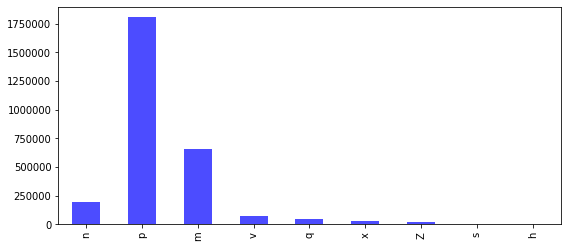

In [153]:
#各折扣下的优惠总金额
plt.figure(figsize=(9,4))
p=pd.Series([-n.discount.sum(), -p.discount.sum(), -m.discount.sum(), -v.discount.sum(), -q.discount.sum(),-x.discount.sum(),-Z.discount.sum(),-s.discount.sum(),-h.discount.sum()], index=['n', 'p', 'm', 'v', 'q','x','Z','s','h'])
p.plot(kind='bar',color = 'blue', alpha = 0.7)

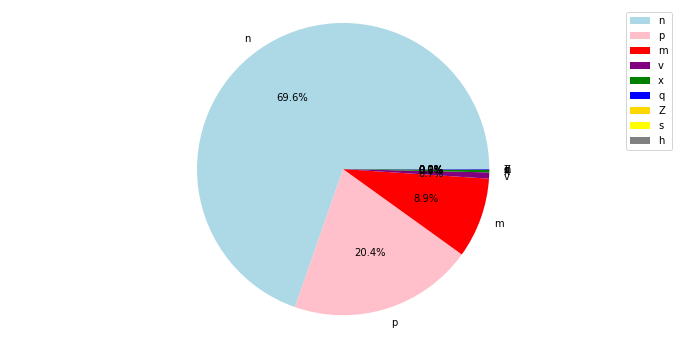

In [162]:
#绘制各折扣数量占比
dis_count = item.discount_type.value_counts()  # 统计每种折扣数
conti = list(dis_count.index)  # 获取各大州名称
labels = conti
colors = ['lightblue','pink','red','purple', 'green','blue','gold','yellow','gray']
plt.figure(figsize=(12,6))
plt.pie(dis_count, labels=labels,colors=colors,shadow=False, autopct='%1.1f%%',pctdistance = 0.6)  # autopct 显示占比
plt.axis('equal')  # 调整坐标轴的比例
plt.legend()
plt.show()

In [20]:
#各种商品的销量和销售额
item_group=item1.groupby(item1.item)
itemq=item_group.sum()
itemq.head(10)

,pos,bask,item_quantity,item_spend,price,discount
item,,,,,,
19,51,1432102,13.0,496.7,505.7,-9.0
31,422,24662773,141.0,5184.9,5922.0,-737.1
33,49,2487295,15.0,613.5,613.5,0.0
36,133,8874084,52.0,1341.6,1341.6,0.0
39,437,13774376,83.0,406.7,406.7,0.0
43,29,1606606,10.0,12.0,12.0,0.0
49,319,12432593,81.0,431.4,431.4,0.0
55,642,41562923,239.0,958.5,946.5,0.0
56,211,12137810,84.0,446.4,441.5,0.0


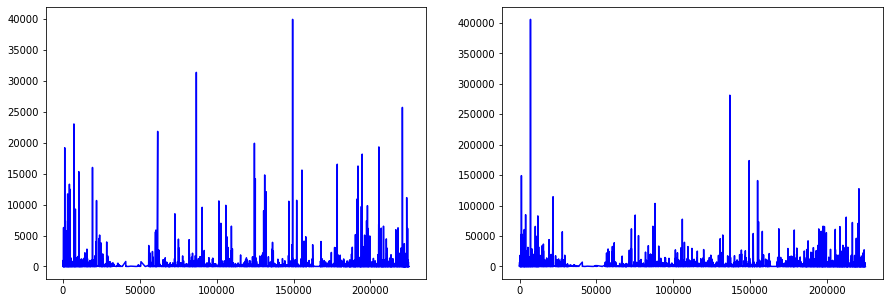

In [21]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
plt.plot(itemq['item_quantity'],color='blue')
ax2 = plt.subplot(122)
plt.plot(itemq['item_spend'],color='blue')

In [22]:
itemq_sort=itemq.sort_values('item_quantity',axis = 0,ascending = False)
itemq_sort.head(10)

,pos,bask,item_quantity,item_spend,price,discount
item,,,,,,
149413,6839,378662245,39931.00,173820.33,12005.233338,-22560.37
86772,8845,521091166,31365.00,65967.20,8187.833333,-12221.30
220834,4518,251784144,25704.00,127622.90,8471.500001,-8513.40
7133,25551,451855888,23028.00,289784.00,107567.000000,-1129.00
61623,9258,432129591,21828.00,38905.90,5040.166667,-863.40
124556,14340,923116764,19907.00,17103.17,5182.000000,-2411.23
205540,37018,2165376903,19313.00,27650.23,18122.200000,-36.97
1152,5021,247137394,19183.00,46344.39,3768.068750,-121.01
194690,28456,1577241570,18151.51,61628.75,37169.080000,-9163.47


In [23]:
item.corr()

,pos,bask,item,item_quantity,item_spend,price,discount
pos,1.000000,-0.092114,-0.007783,0.005567,0.022490,0.051879,-0.006068
bask,-0.092114,1.000000,0.003127,-0.010797,-0.016348,-0.017006,0.005348
item,-0.007783,0.003127,1.000000,-0.007868,0.006989,0.093690,-0.013742
item_quantity,0.005567,-0.010797,-0.007868,1.000000,0.404123,-0.019016,-0.182696
item_spend,0.022490,-0.016348,0.006989,0.404123,1.000000,0.260255,-0.778721
price,0.051879,-0.017006,0.093690,-0.019016,0.260255,1.000000,-0.081782
discount,-0.006068,0.005348,-0.013742,-0.182696,-0.778721,-0.081782,1.000000


In [24]:
top1=item1[item1.item==149413]
top1=top1.sort_values('date',axis = 0,ascending = True)
top1.head()

,date,shop,pos,bask,item,item_quantity,item_spend,price,discount_type,discount
694,2018-06-01,D009,3,144250,149413,1.0,3.65,5.500000,p,-1.85
54732,2018-06-01,A008,3,163593,149413,12.0,52.90,4.916667,m,-6.10
53937,2018-06-01,A001,9,266395,149413,12.0,49.90,4.916667,p,-9.10
51930,2018-06-01,A001,2,125439,149413,12.0,49.90,4.916667,p,-9.10
48527,2018-06-01,A021,3,73050,149413,12.0,50.90,4.916667,m,-8.10


In [25]:
item61=top1[top1.date=='2018-06-01']
item61.item_quantity.sum()

676.0

In [56]:
top1_daysale=top1.groupby(top1.date)
top1_daysale=top1_daysale.sum().reset_index()
top1_daysale

,date,pos,bask,item,item_quantity,item_spend,price,discount
0,2018-06-01,191,7153774,8964780,676.0,2644.22,293.700000,-638.18
1,2018-06-02,186,9710806,10160084,797.0,3181.24,332.400000,-682.06
2,2018-06-03,231,9916094,10608323,823.0,3213.90,347.850000,-772.80
3,2018-06-04,116,6520464,6723585,541.0,2156.10,217.650000,-454.20
4,2018-06-05,134,6665615,7620063,590.0,2367.40,245.616667,-472.20
5,2018-06-06,104,7975344,6275346,508.0,2345.22,205.166667,-124.78
6,2018-06-07,144,8670232,8367128,617.0,2715.98,274.916667,-293.72
7,2018-06-08,148,8564124,7171824,908.0,4024.92,237.600000,-413.88
8,2018-06-09,133,8023035,8217715,986.0,4388.42,268.000000,-620.58
9,2018-06-10,186,10286873,8964780,1132.0,4971.29,294.583333,-563.71


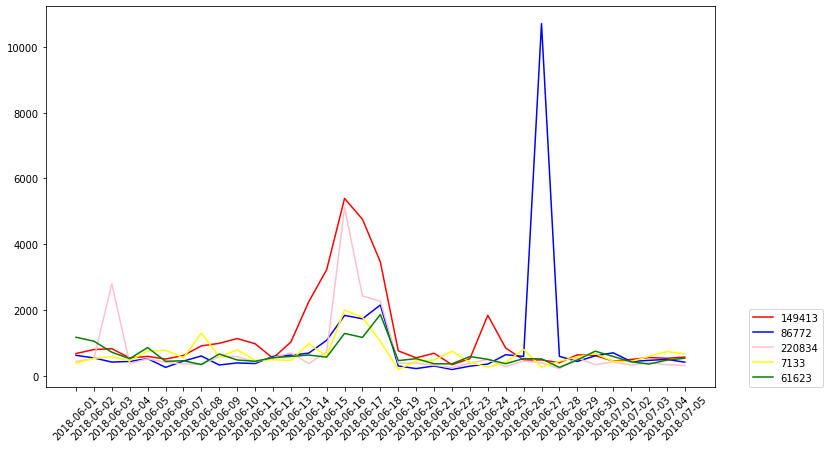

In [90]:
#销量前五的商品每日销售情况
plt.figure(figsize=(12,7))
top2=item1[item1.item==86772]
top2=top2.sort_values('date',axis = 0,ascending = True)
top2_daysale=top2.groupby(top2.date)
top2_daysale=top2_daysale.sum().reset_index()

top3=item1[item1.item==220834]
top3=top3.sort_values('date',axis = 0,ascending = True)
top3_daysale=top3.groupby(top3.date)
top3_daysale=top3_daysale.sum().reset_index()

top4=item1[item1.item==7133]
top4=top4.sort_values('date',axis = 0,ascending = True)
top4_daysale=top4.groupby(top4.date)
top4_daysale=top4_daysale.sum().reset_index()

top5=item1[item1.item==61623]
top5=top5.sort_values('date',axis = 0,ascending = True)
top5_daysale=top5.groupby(top5.date)
top5_daysale=top5_daysale.sum().reset_index()

fig1, = plt.plot(top1_daysale.date, top1_daysale.item_quantity,color='red')
plt.xticks(top2_daysale.date, rotation=45)
fig2, = plt.plot(top2_daysale.date, top2_daysale.item_quantity,color='blue')
fig3, = plt.plot(top3_daysale.date, top3_daysale.item_quantity,color='pink')
fig4, = plt.plot(top4_daysale.date, top4_daysale.item_quantity,color='yellow')
fig5, = plt.plot(top5_daysale.date, top5_daysale.item_quantity,color='green')

plt.legend([fig1, fig2,fig3,fig4,fig5], ['149413','86772', '220834','7133','61623'], bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()

In [58]:
top1_daysale = top1_daysale.drop(['pos','bask','item','item_spend','price','discount'],axis=1)
top2_daysale = top2_daysale.drop(['date','pos','bask','item','item_spend','price','discount'],axis=1)
top3_daysale = top3_daysale.drop(['date','pos','bask','item','item_spend','price','discount'],axis=1)
top4_daysale = top4_daysale.drop(['date','pos','bask','item','item_spend','price','discount'],axis=1)
top5_daysale = top5_daysale.drop(['date','pos','bask','item','item_spend','price','discount'],axis=1)
item_daysale = pd.concat([top1_daysale, top2_daysale,top3_daysale,top4_daysale,top5_daysale], axis=1, join_axes=[top1_daysale.index])
item_daysale 

D:\chromedownload\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


,date,item_quantity,item_quantity,item_quantity,item_quantity,item_quantity
0,2018-06-01,676.0,621.0,434.0,387.0,1171.0
1,2018-06-02,797.0,542.0,528.0,528.0,1051.0
2,2018-06-03,823.0,416.0,2796.0,580.0,716.0
3,2018-06-04,541.0,436.0,372.0,457.0,519.0
4,2018-06-05,590.0,522.0,516.0,745.0,857.0
5,2018-06-06,508.0,255.0,408.0,774.0,439.0
6,2018-06-07,617.0,446.0,360.0,547.0,457.0
7,2018-06-08,908.0,602.0,348.0,1297.0,340.0
8,2018-06-09,986.0,328.0,578.0,574.0,662.0
9,2018-06-10,1132.0,390.0,588.0,789.0,480.0


In [81]:
item_daysale.columns=['date','top1','top2','top3','top4','top5']

In [82]:
correlation_matrix=item_daysale.corr()
correlation_matrix

,top1,top2,top3,top4,top5
top1,1.000000,0.125519,0.789704,0.763190,0.644487
top2,0.125519,1.000000,0.123955,-0.001078,0.141091
top3,0.789704,0.123955,1.000000,0.717525,0.646163
top4,0.763190,-0.001078,0.717525,1.000000,0.493747
top5,0.644487,0.141091,0.646163,0.493747,1.000000


[Text(0, 0, 'top1'),
 Text(0, 0, 'top2'),
 Text(0, 0, 'top3'),
 Text(0, 0, 'top4'),
 Text(0, 0, 'top5')]

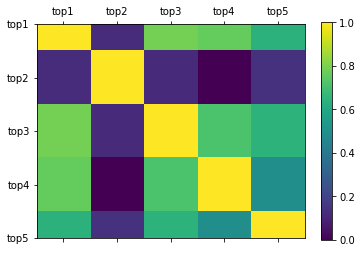

In [89]:
fig = plt.figure() # 调用figure创建一个绘图对象 
ax = fig.add_subplot(111) # 设置1个子网格并添加子网格对象 
hot_img = ax.matshow(np.abs(correlation_matrix), vmin=0, vmax=1) 
# 绘制热力图，值域从0到1 
fig.colorbar(hot_img) # 为热力图生成颜色渐变条 
ticks = np.arange(0, 5, 1) # 生成0～9，步长为1 
ax.set_xticks(ticks) # 生成x轴刻度 
ax.set_yticks(ticks) # 设置y轴刻度 
names = ['top1','top2','top3','top4','top5'] # 生成坐标轴标签文字 
ax.set_xticklabels(names) # 生成x轴标签 
ax.set_yticklabels(names) # 生成y轴标签 

#### 小结
##### （1）同Basket表相同的几种指标分析，总体趋势相同，表明两表其实在日期、商店、销量、销售额等方面反映的是相同内容
##### （2）对不同的折扣种类进行分组，将折扣总金额加和，可以得到不同折扣下打折总金额的分布情况，从图中来看，p类折扣所减的金额是最多的，Z、s、h也有相应的金额折扣，但数量和金额与其他折扣相比数值很小。
##### （3）对各种商品的销售量和销售额分析，发现销量高的商品销售额不一定高
##### （4）分析出销量前十的商品，对前五的商品进行每日销量分析和相关性分析
##### 多数商品均在2018-6-17销量出现明显上升，但“86772”在2018-6-27日出现跳跃式增长。销量前五的商品中，第一的商品与第三、第四种商品相关度较高，与第五的商品相关度次高；第三与第四的商品间也有较高相关性，与第五的商品相关度次高。类似的，可以将相关度较高的商品间进行布设和联合销售策略的设计。